<span style="font-size: 30px; font-weight: bold">Machine Learning Project</span>

In this project, we will be predicting temperatures using linear regression, while implementing machine learning techniques.

In [87]:
#import necessary dependencies
import pandas as pd
from scipy import stats
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

<span style="font-size: 24px; font-weight: bold">Part 1 - Chart a Straight Line</span>

Before we dive into the linear regression process, let's familiarize ourself with graphing equations by graphing the relationship between Celcius and Fahrenheit.

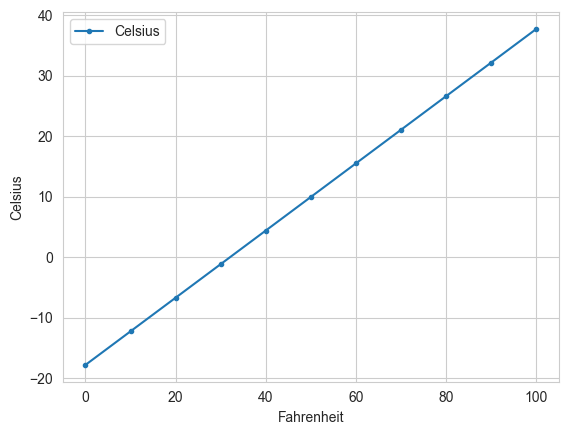

In [88]:
c = lambda f: 5 / 9 * (f - 32) #Relational equation
temps = [(f, c(f)) for f in range(0, 101, 10)] 

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) #create base graph
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')  #build out graph
y_label = axes.set_ylabel('Celsius') #name axis

<span style="font-size: 24px; font-weight: bold">Part 2 - Predict Avg High Temp in NYC in January</span>

<span style="font-size: 18px; font-weight: bold">Section 1 - Data Acquisition</span>

In order to predict temperatures, we need previous data to extrapolate from. We will be pulling in a csv file with the yearly average high temperatures in NYC, in January.

In [89]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

<span style="font-size: 18px; font-weight: bold">Section 2 - Data Inspection</span>

We will now view the head and tail to inspect the data.

In [90]:
nyc_df.head() #Inspect head

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [91]:
nyc_df.tail() #Inspect tail

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


<span style="font-size: 18px; font-weight: bold">Section 3 - Data Cleaning</span>

Let's clean up the data a bit to make it more presentable.

In [92]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly'] #rename columns
nyc_df.head(3) #inspect the new column names


,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [93]:
nyc_df.Date.dtype #determine data type of date 

dtype('int64')

In [94]:
nyc_df.Date = nyc_df.Date.floordiv(100) #Remove the 01 from dates

nyc_df.head(3) #Inspect our change

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


<span style="font-size: 18px; font-weight: bold">Section 4 - Descriptive Statistics</span>

Next, we will review the descriptive statistics, rounded to 2 decimal places.

In [95]:
pd.set_option('display.precision', 2) #Set rounding to 2 decimals

nyc_df.Temperature.describe() # Print statistics

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Here we see there are 124 data entries, which matches the data stated from 1895 to 2018.

<span style="font-size: 18px; font-weight: bold">Section 5 - Build the Model</span>

Next, we build the model to predict future temperatures.

In [96]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [97]:
linear_regression.slope

0.014771361132966163

In [98]:
linear_regression.intercept

8.694993233674289

<span style="font-size: 18px; font-weight: bold">Section 6 - Predict</span>

Using the values calculated above, we will plug in the x value of 2019 and 1890 to calculate the expected average high temperatures.

In [99]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [100]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

According to our equation, the value would be 36.61 degrees in 1890 and 38.52 degrees in 2019.

<span style="font-size: 18px; font-weight: bold">Section 7 - Visualizations</span>

Finally, we present a plot of the data with the equation line.

(10.0, 70.0)

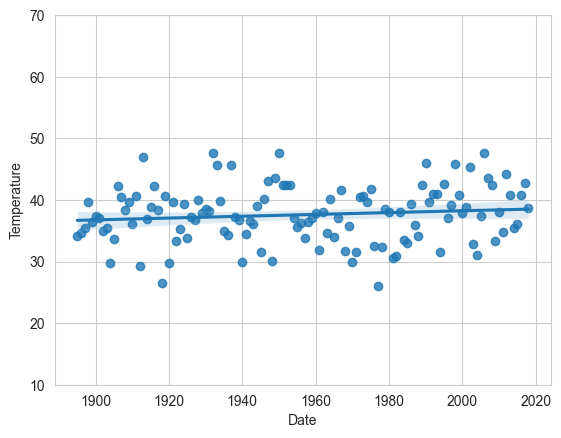

In [101]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

axes.set_ylim(10, 70)

<span style="font-size: 24px; font-weight: bold">Part 3 - Use Scikit-Learn Estimator to Predict Avg High Temp in NYC in January</span>

<span style="font-size: 18px; font-weight: bold">Section 1 - Build the Model</span>


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

print(X_train.shape)

print(X_test.shape)


(93, 1)
(31, 1)


In [103]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [104]:
linear_regression.coef_ #Get coeffieicnt for our equation

array([0.01939167])

In [105]:
linear_regression.intercept_ #Get intercept for our equation

-0.30779820252656975

<span style="font-size: 18px; font-weight: bold">Section 2 - Test the Model</span>

In [106]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


<span style="font-size: 18px; font-weight: bold">Section 3 - Predict </span>

In [107]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [108]:
predict(1890)

array([36.34246432])

<span style="font-size: 18px; font-weight: bold">Section 3 - Visualizations </span>

Finally, we plot our graph with the calculated regression line.

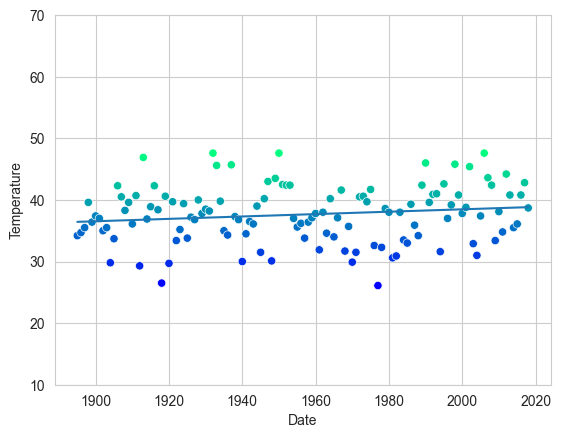

In [109]:
axes = sns.scatterplot(data = nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x,y)

<span style="font-size: 24px; font-weight: bold">Part 4 - Insights</span>

First, it's important to note that we can't draw difinitive conclusions on which method, object oriented programming (OOP) or machine learning (ML), is more accurate in this example. Even if we took the real-life data for 2019 and saw which method led to a closer prediction, we couldn't draw conclusions from that because the single data point of 2019 can vary greatly from the predicted value. Ideally, we would test these methods on many data points, even more than 2019-2024, to see which method was more accurate for this example.

Instead of indexing in on this one project to make conclusive statements, we'll discuss the general differences between the methods which were highlighted in this project, while touching on their strengths and weaknesses.

One benefit of ML is supposed to be its ease of use as projects get more complex. I feel that this project didn't illustrate a large difference between the two methods in this regard. Both methods were fairly similar in terms of work-up required. I assume as data sets get more complex, this would become more apparent. At which point, OOP would allow you more control over your method, while ML can help expedite the process for quicker and potentially more accurate results.

Another important issue to discuss is that this project focused on linear regression. In order to create a model, we are assuming the data is linear. I'm not an expert on the subject of temperature changes over time, but assuming the change is linear seems like a pretty big assumption. If the data has a slight upward skew as time goes on, us forcing the pattern to be linear will underestimate our future predictions. That being said, since we are only predicting the data from one year before and after our data set, the error assuming it isn't a linear relationship wouldn't be terribly large (but still is notable). This would be a much bigger issue if we were tasked with predicting data from 50 years in the future. 

Continuing with the discussion of the linear relationship, it would be interesting if we split the data set into two, and created a linear model using data from 1895-1956 and the other from 1957-2018. We could then use the models to predict values for the data we already have, and see if the linear regression lines match fairly well. We would also see if the later years have a higher slope, indicating a higher change in temperature, and suggesting the change in temperature year over year may not be linear.